In [1]:
#import basic libraries for data preprocessing and EDA
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.5f}'.format
import warnings
import math

data = pd.read_csv("Life Expectancy Data.csv")

In [2]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing          65.00000        263.00000   
1  Afghanistan  2014  Developing          59.90000        271.00000   
2  Afghanistan  2013  Developing          59.90000        268.00000   
3  Afghanistan  2012  Developing          59.50000        272.00000   
4  Afghanistan  2011  Developing          59.20000        275.00000   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62  0.01000                71.27962     65.00000      1154  ...   
1             64  0.01000                73.52358     62.00000       492  ...   
2             66  0.01000                73.21924     64.00000       430  ...   
3             69  0.01000                78.18422     67.00000      2787  ...   
4             71  0.01000                 7.09711     68.00000      3013  ...   

     Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP  \
0  6.00000            8.16000     65.00000    0.10000 584.25921   
1 58.00000            8.18000     62.00000    0.10000 612.69651   
2 62.00000            8.13000     64.00000    0.10000 631.74498   
3 67.00000            8.52000     67.00000    0.10000 669.95900   
4 68.00000            7.87000     68.00000    0.10000  63.53723   

      Population   thinness  1-19 years   thinness 5-9 years  \
0 33736494.00000               17.20000             17.30000   
1   327582.00000               17.50000             17.50000   
2 31731688.00000               17.70000             17.70000   
3  3696958.00000               17.90000             18.00000   
4  2978599.00000               18.20000             18.20000   

   Income composition of resources  Schooling  
0                          0.47900   10.10000  
1                          0.47600   10.00000  
2                          0.47000    9.90000  
3                          0.46300    9.80000  
4                          0.45400    9.50000  

[5 rows x 22 columns]

In [3]:
data.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing          44.30000        723.00000   
2934  Zimbabwe  2003  Developing          44.50000        715.00000   
2935  Zimbabwe  2002  Developing          44.80000         73.00000   
2936  Zimbabwe  2001  Developing          45.30000        686.00000   
2937  Zimbabwe  2000  Developing          46.00000        665.00000   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27  4.36000                 0.00000     68.00000        31   
2934             26  4.06000                 0.00000      7.00000       998   
2935             25  4.43000                 0.00000     73.00000       304   
2936             25  1.72000                 0.00000     76.00000       529   
2937             24  1.68000                 0.00000     79.00000      1483   

      ...    Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP  \
2933  ... 67.00000            7.13000     65.00000   33.60000 454.36665   
2934  ...  7.00000            6.52000     68.00000   36.70000 453.35116   
2935  ... 73.00000            6.53000     71.00000   39.80000  57.34834   
2936  ... 76.00000            6.16000     75.00000   42.10000 548.58731   
2937  ... 78.00000            7.10000     78.00000   43.50000 547.35888   

         Population   thinness  1-19 years   thinness 5-9 years  \
2933 12777511.00000                9.40000              9.40000   
2934 12633897.00000                9.80000              9.90000   
2935   125525.00000                1.20000              1.30000   
2936 12366165.00000                1.60000              1.70000   
2937 12222251.00000               11.00000             11.20000   

      Income composition of resources  Schooling  
2933                          0.40700    9.20000  
2934                          0.41800    9.50000  
2935                          0.42700   10.00000  
2936                          0.42700    9.80000  
2937                          0.43400    9.80000  

[5 rows x 22 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.shape

(2938, 22)

In [6]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths    Alcohol  \
count 2938.00000        2928.00000       2928.00000     2938.00000 2744.00000   
mean  2007.51872          69.22493        164.79645       30.30395    4.60286   
std      4.61384           9.52387        124.29208      117.92650    4.05241   
min   2000.00000          36.30000          1.00000        0.00000    0.01000   
25%   2004.00000          63.10000         74.00000        0.00000    0.87750   
50%   2008.00000          72.10000        144.00000        3.00000    3.75500   
75%   2012.00000          75.70000        228.00000       22.00000    7.70250   
max   2015.00000          89.00000        723.00000     1800.00000   17.87000   

       percentage expenditure  Hepatitis B     Measles        BMI   \
count              2938.00000   2385.00000   2938.00000 2904.00000   
mean                738.25130     80.94046   2419.59224   38.32125   
std                1987.91486     25.07002  11467.27249   20.04403   
min                   0.00000      1.00000      0.00000    1.00000   
25%                   4.68534     77.00000      0.00000   19.30000   
50%                  64.91291     92.00000     17.00000   43.50000   
75%                 441.53414     97.00000    360.25000   56.20000   
max               19479.91161     99.00000 212183.00000   87.30000   

       under-five deaths       Polio  Total expenditure  Diphtheria   \
count          2938.00000 2919.00000         2712.00000   2919.00000   
mean             42.03574   82.55019            5.93819     82.32408   
std             160.44555   23.42805            2.49832     23.71691   
min               0.00000    3.00000            0.37000      2.00000   
25%               0.00000   78.00000            4.26000     78.00000   
50%               4.00000   93.00000            5.75500     93.00000   
75%              28.00000   97.00000            7.49250     97.00000   
max            2500.00000   99.00000           17.60000     99.00000   

        HIV/AIDS          GDP       Population   thinness  1-19 years  \
count 2938.00000   2490.00000       2286.00000             2904.00000   
mean     1.74210   7483.15847   12753375.12005                4.83970   
std      5.07778  14270.16934   61012096.50843                4.42019   
min      0.10000      1.68135         34.00000                0.10000   
25%      0.10000    463.93563     195793.25000                1.60000   
50%      0.10000   1766.94760    1386542.00000                3.30000   
75%      0.80000   5910.80633    7420359.00000                7.20000   
max     50.60000 119172.74180 1293859294.00000               27.70000   

        thinness 5-9 years  Income composition of resources  Schooling  
count           2904.00000                       2771.00000 2775.00000  
mean               4.87032                          0.62755   11.99279  
std                4.50888                          0.21090    3.35892  
min                0.10000                          0.00000    0.00000  
25%                1.50000                          0.49300   10.10000  
50%                3.30000                          0.67700   12.30000  
75%                7.20000                          0.77900   14.30000  
max               28.60000                          0.94800   20.70000

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
data=data.rename(columns={'Life expectancy ':'Life expectancy','Measles ':'Measles',' BMI ':'BMI','Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness  1-19 years',' thinness 5-9 years':'thinness 5-9 years'})

In [9]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
#FILLING NULL VALUES TO AVOID TRAIN AND TEST ERROR
data=data.fillna(data.mean())

In [12]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
#Remoivng duplicate rows
sum(data.duplicated())

0

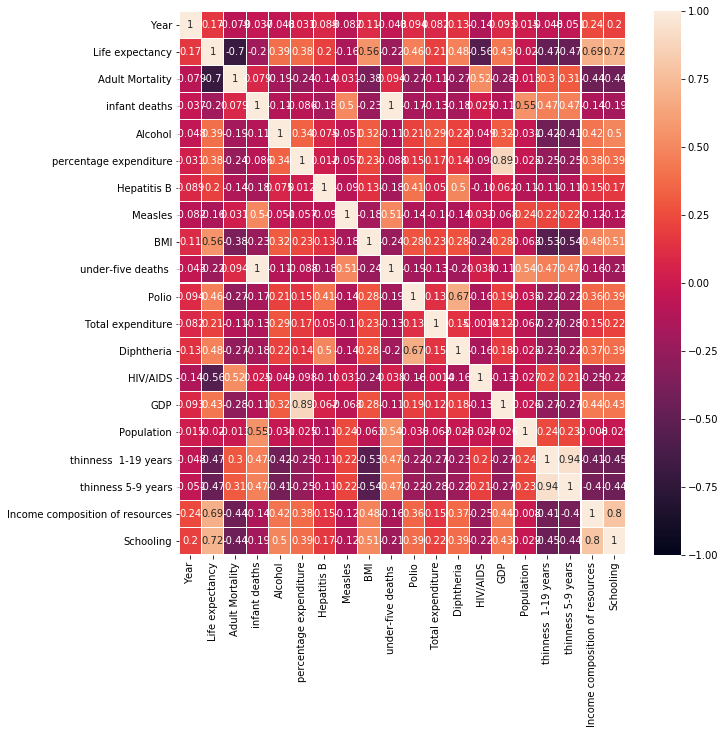

In [14]:
#PLOTTING A HEATMAP 
data_kor=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_kor,vmin=-1,vmax=1,annot=True,linewidth=0.1)

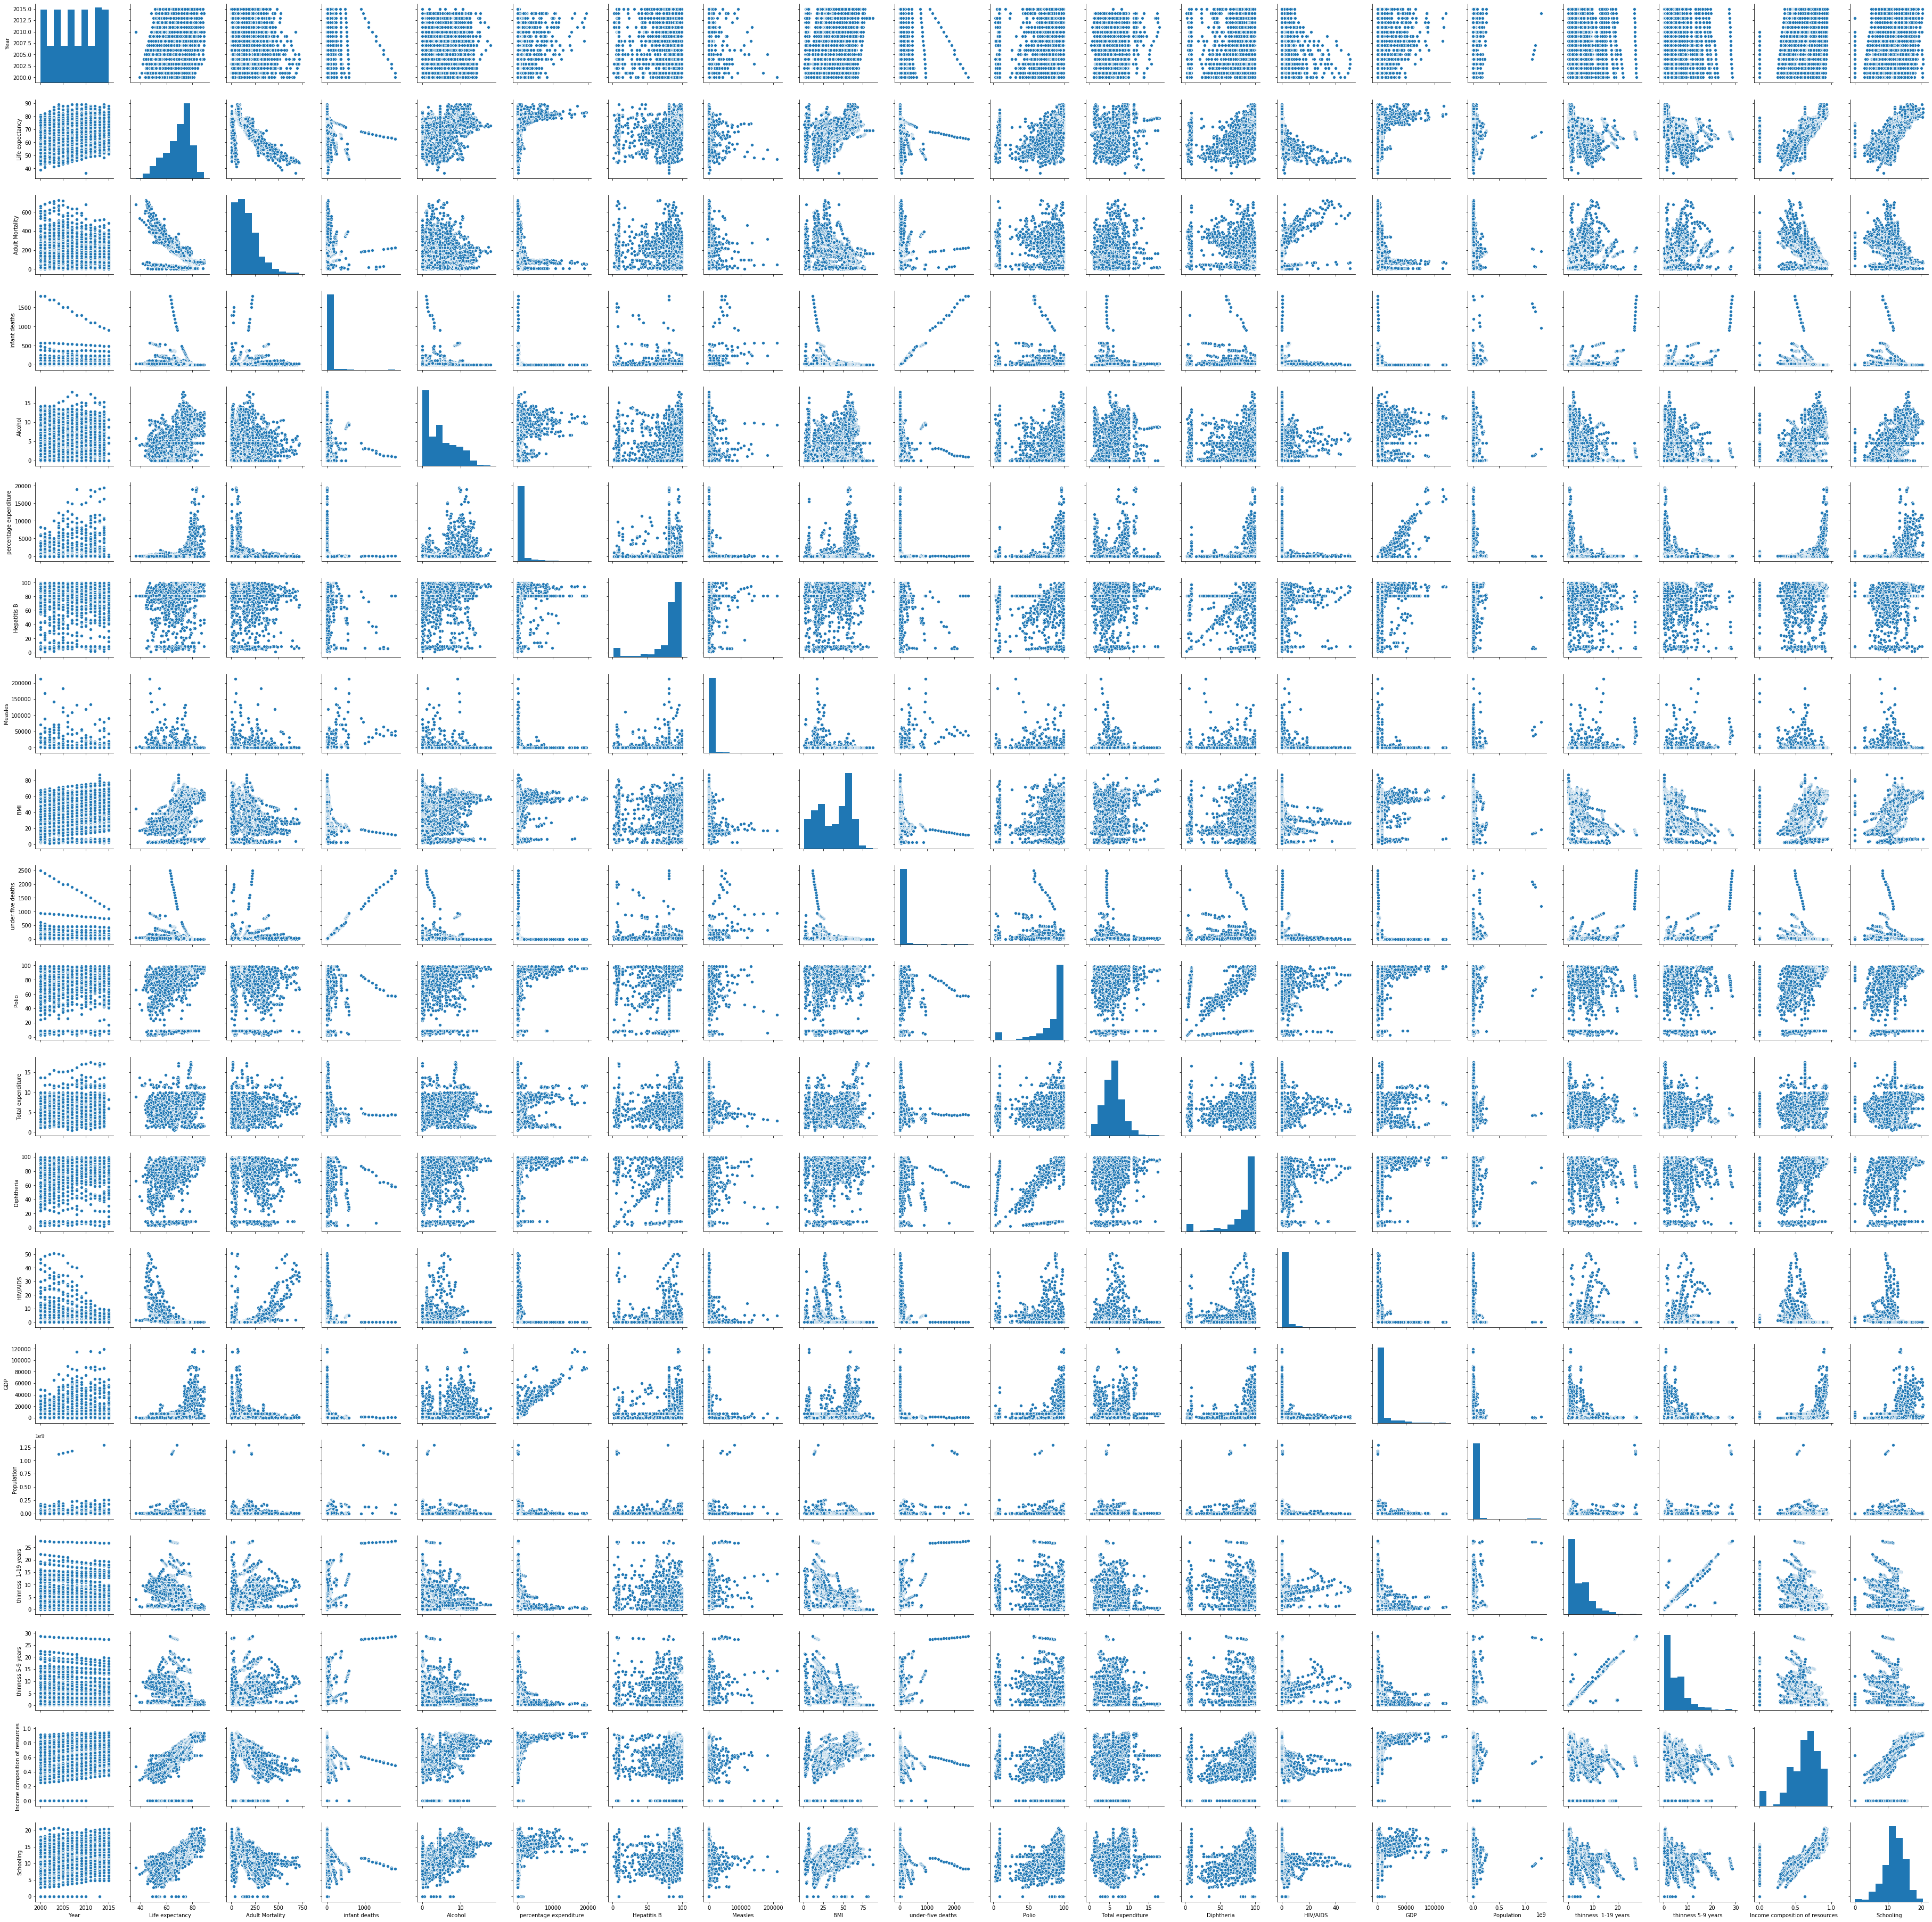

In [15]:
#PLOTTING A PAIRPLOT
sns.pairplot(data)

## TRAINING AND TESTING THE DATASET

In [16]:
#import libraries for pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#import libraries for train and test
from sklearn.model_selection import train_test_split
#import ExtraTreesRegressor for model fit and prediction
from sklearn.ensemble import ExtraTreesRegressor
#import libraries for accuracy and error calculation
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
#SPLITTING THE DATASET
Y=data['Life expectancy']
X=data[data.columns.difference(['Life expectancy'])]

In [18]:
#SEE NUMERICAL COLUMNS
data.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
#SEE CATEGORICAL COLUMNS
data.select_dtypes(include=['object', 'bool']).columns

Index(['Country', 'Status'], dtype='object')

In [20]:
#IDENTIFY THE CATEGORICAL VALUES FOR COLUMNTRANSFORM
categorical_features = ['Country', 'Status']
categorical_feature_mask = X.dtypes==object
categorical_features = X.columns[categorical_feature_mask].tolist()
#DEFINE CATEGORICAL PIPELINE
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

In [21]:
#IDENTIFY THE NUMERIC VALUES FOR COLUMNTRANSFORM
numeric_features = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years','Income composition of resources', 'Schooling']
numeric_feature_mask = X.dtypes!=object
numeric_features = X.columns[numeric_feature_mask].tolist()
#DEFINE NUMERIC PIPELINE
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [22]:
#PIPELINNING USING COLUMNTRANSFORM
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [23]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
ExtraTreeRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('ExtraTreeRegressor', ExtraTreesRegressor(n_estimators=100, random_state=0))
])

In [24]:
#TRAIN-TEST SPLIT
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [25]:
#FIT THE TRAINING MODEL
reg = ExtraTreeRegressor.fit(X_train, Y_train)

In [26]:
#PREDICT THE TEST DATA VALUE
test_pred=reg.predict(X_test)
print(test_pred)

[56.396      55.199      53.76       67.272      67.963      76.146
 72.018      54.662      71.12374795 73.587      79.208      73.65
 76.019      72.093      71.04124932 75.13       78.482      57.195
 66.49824932 67.249      77.636      75.229      74.714      75.634
 78.515      59.389      73.433      60.171      65.009      52.614
 79.055      72.773      73.251      73.693      81.599      72.849
 78.533      82.802      81.719      76.849      45.059      73.003
 82.343      74.045      74.411      72.313      67.568      62.841
 58.908      49.181      72.35124932 59.036      67.653      71.587
 66.715      73.074      75.552      62.829      65.773      82.132
 67.761      76.27       75.019      83.469      74.378      72.9
 66.703      63.252      64.169      67.429      74.028      60.068
 55.906      51.544      72.682      72.157      69.997      67.24524932
 59.069      77.346      55.902      73.598      64.316      83.189
 73.848      46.086      52.542      45.197   

In [27]:
#ESTIMATING ERROR
print('Mean squared error: ',mean_squared_error(Y_test, test_pred))
print('R2 score: ',r2_score(Y_test, test_pred)*100)

Mean squared error:  1.565270242056723
R2 score:  98.22903945725523


In [28]:
#import DecisionTreeRegressor for model fit and prediction
from sklearn.tree import DecisionTreeRegressor

In [29]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
DecisionTreeRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=0))
])

In [30]:
#FIT THE TRAINING MODEL
reg1 = DecisionTreeRegressor.fit(X_train, Y_train)

In [31]:
#PREDICT THE TEST DATA VALUE
test_pred1=reg1.predict(X_test)
print(test_pred1)

[63.8        58.8        52.6        66.7        68.4        76.4
 73.4        52.7        71.4        73.2        79.         76.
 76.         71.6        74.         75.4        78.3        57.3
 65.9        82.         77.7        75.5        75.6        74.9
 78.2        58.9        73.6        59.7        63.7        54.
 79.2        72.9        73.1        73.6        81.3        71.8
 79.6        82.         81.3        76.8        45.5        73.5
 82.         74.4        74.1        71.6        71.1        66.6
 61.7        56.2        72.9        64.2        67.9        71.4
 66.6        73.3        73.9        61.6        66.5        82.
 68.2        75.9        74.6        81.5        71.         71.5
 64.7        61.2        65.8        67.4        73.9        57.4
 51.8        54.         72.3        71.8        70.         67.3
 58.1        77.1        51.         74.1        63.3        81.4
 73.7        45.9        53.         44.5        76.2        76.8
 62.6        

In [32]:
#ESTIMATING ERROR
print('Mean squared error: ',mean_squared_error(Y_test, test_pred1))
print('R2 score: ',r2_score(Y_test, test_pred1)*100)

Mean squared error:  7.372179740073359
R2 score:  91.65905088916959


In [34]:
#import RandomForestRegressor for model fit and prediction
from sklearn.ensemble import RandomForestRegressor

In [35]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
RandomForestRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('RandomForestRegressor', RandomForestRegressor(random_state=0))
])

In [38]:
#FIT THE TRAINING MODEL
reg2 = RandomForestRegressor.fit(X_train, Y_train)

In [41]:
#PREDICT THE TEST DATA VALUE
test_pred2=reg2.predict(X_test)
print(test_pred2)

[61.683      57.724      53.806      67.274      68.052      76.144
 73.502      53.566      70.455      73.597      78.943      74.038
 75.607      71.914      70.81849863 75.129      78.597      57.002
 66.879      71.092      77.798      75.357      75.031      75.416
 78.732      58.961      73.06324932 59.121      64.939      53.036
 79.403      72.947      73.719      73.73       81.962      73.09
 78.777      82.674      83.06       76.81       45.07       73.328
 82.579      74.23       74.353      73.123      68.32824932 63.771
 63.133      51.289      72.60524932 60.869      68.516      72.338
 66.951      72.891      76.41       62.74       66.429      83.79
 68.278      76.116      75.04       83.11       74.58949863 72.46424932
 67.597      62.189      65.19       67.909      74.436      59.953
 53.796      52.447      72.53049863 72.189      70.214      67.949
 59.955      76.66       55.627      73.608      65.17       82.47
 74.167      47.593      52.667      45.195   

In [40]:
#ESTIMATING ERROR
print('Mean squared error: ',mean_squared_error(Y_test, test_pred2))
print('R2 score: ',r2_score(Y_test, test_pred2)*100)

Mean squared error:  2.593696618134782
R2 score:  97.06546879436503


In [42]:
#import GradientBoostingRegressor for model fit and prediction
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
GradientBoostingRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=0))
])

In [44]:
#FIT THE TRAINING MODEL
reg3 = GradientBoostingRegressor.fit(X_train, Y_train)

In [45]:
#PREDICT THE TEST DATA VALUE
test_pred3=reg3.predict(X_test)
print(test_pred3)

[61.59374492 57.92146249 54.55751429 68.5284732  69.51305503 75.29246706
 72.19661169 53.47501192 69.85107342 73.74144377 78.43353731 72.64303396
 74.50984004 73.51042835 70.98292397 74.23120512 80.36732705 59.41910101
 68.28678906 69.46624248 77.18532314 73.70156753 75.039131   74.71355369
 76.27969372 59.45145121 72.92526801 61.06946061 65.64799311 51.79991783
 80.09883671 72.12664416 74.54530989 74.4548708  82.67123581 73.73910641
 80.8755135  82.92984531 81.11514756 76.71299013 46.52802935 73.93870009
 83.00337196 74.23124911 74.66188195 72.21786979 68.33934576 65.36864273
 63.47519131 52.04638232 73.60614017 60.13778139 70.25774934 72.13757633
 68.89144795 70.92458079 78.11422977 62.40039641 67.82699304 82.15616242
 70.88963573 76.14311695 74.99080732 82.27546311 73.06840046 71.64285729
 67.76727973 62.9281981  65.72810207 67.25761795 73.67084787 58.38078553
 54.69821728 51.43435814 72.6625455  71.70599004 70.53468101 68.35589267
 60.89188876 77.77812063 56.14183316 73.46384936 66

In [46]:
#ESTIMATING ERROR
print('Mean squared error: ',mean_squared_error(Y_test, test_pred3))
print('R2 score: ',r2_score(Y_test, test_pred3)*100)

Mean squared error:  4.555683774010426
R2 score:  94.84565924003385


In [47]:
#import AdaBoostRegressor for model fit and prediction
from sklearn.ensemble import AdaBoostRegressor

In [48]:
#DEFINE A REGRESSOR MODEL USING PIPELINE FUNCTION
AdaBoostRegressor = Pipeline([
     ('preprocessor', preprocessor),
     ('AdaBoostRegressor', AdaBoostRegressor(n_estimators=100, random_state=0))
])

In [50]:
#FIT THE TRAINING MODEL
reg4 = AdaBoostRegressor.fit(X_train, Y_train)

In [51]:
#PREDICT THE TEST DATA VALUE
test_pred4=reg4.predict(X_test)
print(test_pred4)

[61.24102564 57.38145161 49.24333333 69.77123926 71.15727036 73.45313718
 73.178709   54.40856354 71.15727036 72.59404389 80.4134997  71.13940694
 75.79307529 73.08962466 72.9807937  72.59404389 81.8765343  61.04214876
 70.48326437 71.59953662 80.57026696 72.38186813 72.34696971 73.31629987
 77.36363589 61.82510823 73.47579874 58.54435644 66.76340956 49.32368932
 81.8765343  72.34696971 73.08962466 73.26181908 83.47156989 73.26181908
 82.84478873 83.51414516 83.47156989 74.54572796 48.27666667 73.80954616
 83.47156989 73.67216958 73.67216958 73.14556213 71.87944351 66.88864865
 64.29767442 54.2730137  74.17468687 60.80717629 71.37123288 73.02786885
 71.92967537 67.30695364 72.90758808 62.54487321 69.69222615 82.84478873
 72.89703264 73.90421112 74.08053646 82.91380597 72.88992102 72.86030107
 67.20023923 63.65643836 68.7735729  66.83333333 72.88992102 58.54435644
 55.34033366 51.26733668 73.45313718 72.90758808 72.80249943 69.93076923
 62.75778388 80.4134997  56.5027027  71.34085717 69

In [52]:
#ESTIMATING ERROR
print('Mean squared error: ',mean_squared_error(Y_test, test_pred4))
print('R2 score: ',r2_score(Y_test, test_pred4)*100)

Mean squared error:  8.700491350464974
R2 score:  90.15618743002508
